# Libs

In [1]:
import joblib
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout

2025-02-09 16:48:40.532376: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-09 16:48:40.634481: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-09 16:48:40.731089: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739130520.805927    1830 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739130520.828817    1830 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-09 16:48:40.985449: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# Code

## Config

In [2]:
# YFinace
TICKERS = 'DIS'
START_DATE = '2000-01-01'
END_DATE = '2025-02-01'

# Data
DAYS = 60
TEST_SIZE = 0.2
SEED = 42

# Model
DROPOUT_RATE = 0.2

# Train
EPOCHS = 50
BATCH_SIZE = 32

## Data

In [3]:
data = yf.download(tickers=TICKERS, start=START_DATE, end=END_DATE, multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6309 entries, 2000-01-03 to 2025-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6309 non-null   float64
 1   High    6309 non-null   float64
 2   Low     6309 non-null   float64
 3   Open    6309 non-null   float64
 4   Volume  6309 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 295.7 KB


In [5]:
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2000-01-03,22.833179,22.880948,21.973353,22.355498,8402230
2000-01-04,24.170687,24.361760,22.928714,22.928714,16051191
2000-01-05,25.173820,25.317127,24.170690,24.170690,19823822
2000-01-06,24.170687,25.317124,24.170687,25.173818,7903193
2000-01-07,23.788546,24.552836,23.549704,24.170691,6773543


## Data Pre processor

In [6]:
data = data[['Open', 'High', 'Low', 'Close']]

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

x, y = [], []
for i in range(len(data_scaled) - DAYS - 1):
	x.append(data_scaled[i:(i + DAYS), :-1])
	y.append(data_scaled[i + DAYS, -1])

x, y = np.array(x), np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=SEED)

## Model

In [7]:
model = Sequential()
model.add(Input(shape=(DAYS, x_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(DROPOUT_RATE))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

2025-02-09 16:48:45.959364: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Train

In [8]:
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test))

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0204 - val_loss: 5.3721e-04
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0014 - val_loss: 5.2136e-04
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0010 - val_loss: 3.7092e-04
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0010 - val_loss: 4.4375e-04
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 8.6074e-04 - val_loss: 2.4148e-04
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 7.3392e-04 - val_loss: 2.7821e-04
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 6.3661e-04 - val_loss: 2.2361e-04
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 6.2220e-04 - val_loss: 3.5937e-04
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 6.4554e-04 - val_loss: 2.3569e-04
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 5.6070e-04 - val_loss: 3.3237e-04
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 6.8

## Predict

In [9]:
predictions = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [10]:
predictions_aux = np.zeros((len(predictions), data.shape[1]))
predictions_aux[:, -1] = predictions.flatten()
predictions_real = scaler.inverse_transform(predictions_aux)[:,-1]

y_test_aux = np.zeros((len(predictions), data.shape[1]))
y_test_aux[:, -1] = y_test
y_test_real = scaler.inverse_transform(y_test_aux)[:,-1]

## Metrics

In [11]:
mse = mean_squared_error(y_test_real, predictions_real)
mae = mean_absolute_error(y_test_real, predictions_real)
r2 = r2_score(y_test_real, predictions_real)
mape = mean_absolute_percentage_error(y_test_real, predictions_real)
ev_score = explained_variance_score(y_test_real, predictions_real)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')
print(f'MAPE: {mape}')
print(f'EV: {ev_score}')

MSE: 4.400420288515609
MAE: 1.3525508803778012
R2: 0.9978176017835148
MAPE: 0.026044585053844223
EV: 0.9982453725028919


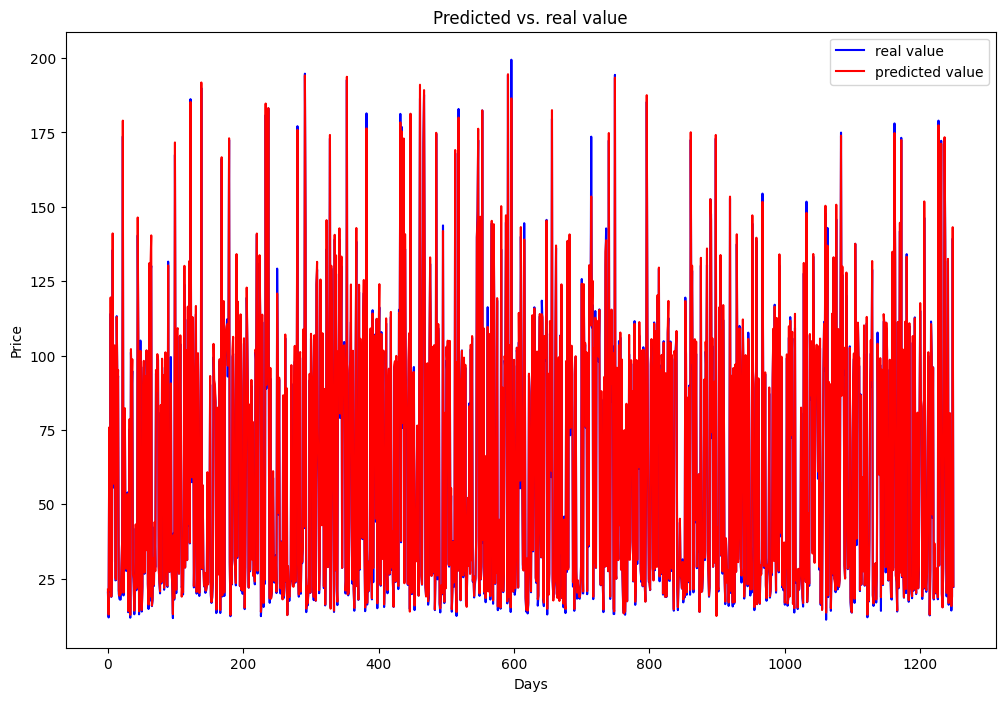

In [12]:
plt.figure(figsize=(12, 8))
plt.plot(y_test_real, color='blue', label='real value')
plt.plot(predictions_real, color='red', label='predicted value')
plt.title('Predicted vs. real value')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

## Save model

In [13]:
model.save('model.keras')
joblib.dump(scaler, 'scaler.gz')

['scaler.gz']